In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('ocs_cleaned.csv')

In [4]:
df.describe()

,thc_min,thc_max,cbd_min,cbd_max,price,price_per_gram,grams
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,17.248684,22.978289,0.327873,1.776294,51.197105,7.771053,7.958333
std,3.654808,4.116879,1.674456,2.878679,40.120408,2.225878,7.999342
min,0.000000,1.000000,0.000000,0.000000,7.200000,3.570000,1.000000
25%,16.000000,22.000000,0.000000,1.000000,26.950000,6.100000,3.500000
50%,18.000000,24.000000,0.000000,1.000000,36.450000,7.700000,3.500000
75%,20.000000,25.000000,0.000000,1.200000,65.450000,9.700000,7.000000
max,23.000000,29.700000,14.000000,20.000000,249.950000,13.710000,30.000000


#### Histograms

Text(0, 0.5, 'Frequency')

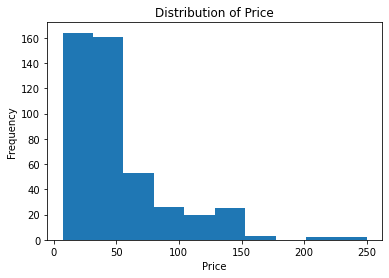

In [35]:
plt.hist(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

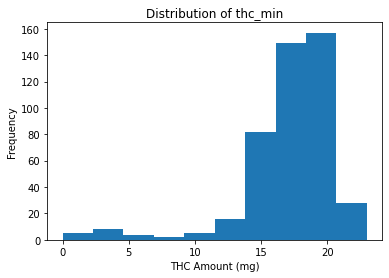

In [37]:
plt.hist(df['thc_min'])
plt.title('Distribution of thc_min')
plt.xlabel('THC Amount (mg)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

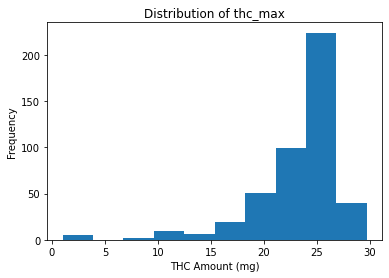

In [38]:
plt.hist(df['thc_max'])
plt.title('Distribution of thc_max')
plt.xlabel('THC Amount (mg)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

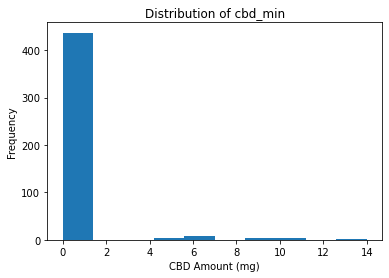

In [39]:
plt.hist(df['cbd_min'])
plt.title('Distribution of cbd_min')
plt.xlabel('CBD Amount (mg)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

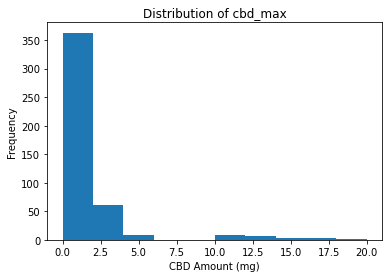

In [40]:
plt.hist(df['cbd_max'])
plt.title('Distribution of cbd_max')
plt.xlabel('CBD Amount (mg)')
plt.ylabel('Frequency')

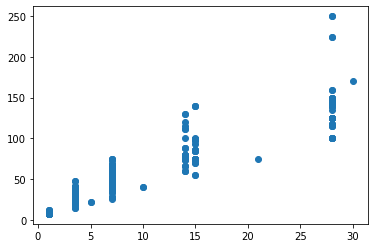

Text(0, 0.5, 'Frequency')

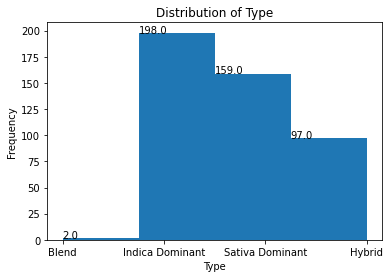

In [65]:
bins=4
arr=plt.hist(df['type'],bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
    
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')

#### Scatterplots

In [41]:
df.columns

Index(['name', 'type', 'producer', 'brand', 'potency', 'thc_min', 'thc_max',
       'cbd_min', 'cbd_max', 'price', 'price_per_gram', 'grams'],
      dtype='object')

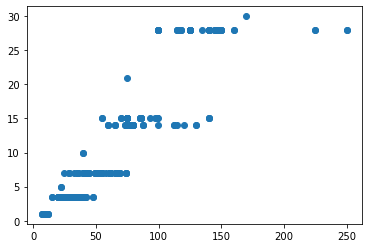

In [69]:
plt.scatter(df['price'],df['grams'])